### Import and setup libraries

In [1]:
import os
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

### Mediapipe inference

In [2]:
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose

# Setup the Pose function for images - independently for the images standalone processing.
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Setup the Pose function for videos - for video processing.
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.7,
                          min_tracking_confidence=0.7)

# Initialize mediapipe drawing class - to draw the landmarks points.
mp_drawing = mp.solutions.drawing_utils

In [9]:
def detectPose(image_pose, pose, draw=False, display=False):
    
    original_image = image_pose.copy()
    
    image_in_RGB = cv2.cvtColor(image_pose, cv2.COLOR_BGR2RGB) # openCV uses BGR, hence we need to convert to normal RGB
    
    resultant = pose.process(image_in_RGB) # perform pose detection

    keypoints = []

    # extract landmark coordinates from the defined variable and put them into a list
    # list has length of 33, for each body key-point detected
    if resultant.pose_landmarks:
        # print(resultant.pose_landmarks.landmark)

        for data_point in resultant.pose_landmarks.landmark:
            keypoints.append({
                                'X': data_point.x,
                                'Y': data_point.y,
                                'Z': data_point.z
                                })
    
    # normalize the pixel values from mediapipe to draw using opencv
    image_rows, image_cols, _ = original_image.shape
    left_wrist = _normalized_to_pixel_coordinates(keypoints[15]['X'],keypoints[15]['Y'],image_cols,image_rows)
    right_wrist = _normalized_to_pixel_coordinates(keypoints[16]['X'],keypoints[16]['Y'],image_cols,image_rows)
    # left_index = _normalized_to_pixel_coordinates(keypoints[19]['X'],keypoints[19]['Y'],image_cols,image_rows)
    # right_index = _normalized_to_pixel_coordinates(keypoints[20]['X'],keypoints[20]['Y'],image_cols,image_rows)
    # left_thumb = _normalized_to_pixel_coordinates(keypoints[21]['X'],keypoints[21]['Y'],image_cols,image_rows)
    # right_thumb = _normalized_to_pixel_coordinates(keypoints[22]['X'],keypoints[22]['Y'],image_cols,image_rows)

    # # draw landmarks using mediapipe API
    # if resultant.pose_landmarks and draw:    

    #     mp_drawing.draw_landmarks(image=original_image, landmark_list=resultant.pose_landmarks,
    #                               connections=mp_pose.POSE_CONNECTIONS,
    #                               landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255),
    #                                                                            thickness=3, circle_radius=3),
    #                               connection_drawing_spec=mp_drawing.DrawingSpec(color=(49,125,237),
    #                                                                            thickness=2, circle_radius=2))


    # draw circles on left and right wrists
    cv2.circle(original_image, left_wrist, 3, (0,255,0), 3)
    cv2.circle(original_image, right_wrist, 3, (0,0,255), 3)
    # cv2.circle(original_image, left_index, 3, (0,255,0), 3)
    # cv2.circle(original_image, right_index, 3, (0,0,255), 3)
    # cv2.circle(original_image, left_thumb, 3, (0,255,0), 3)
    # cv2.circle(original_image, right_thumb, 3, (0,0,255), 3)

    if display:
            
            plt.figure(figsize=[10,10])
            plt.subplot(121);plt.imshow(image_pose[:,:,::-1]);plt.title("Input Image");plt.axis('off');
            plt.subplot(122);plt.imshow(original_image[:,:,::-1]);plt.title("Pose detected Image");plt.axis('off');

    else:
        
        return original_image, resultant

IndexError: list index out of range

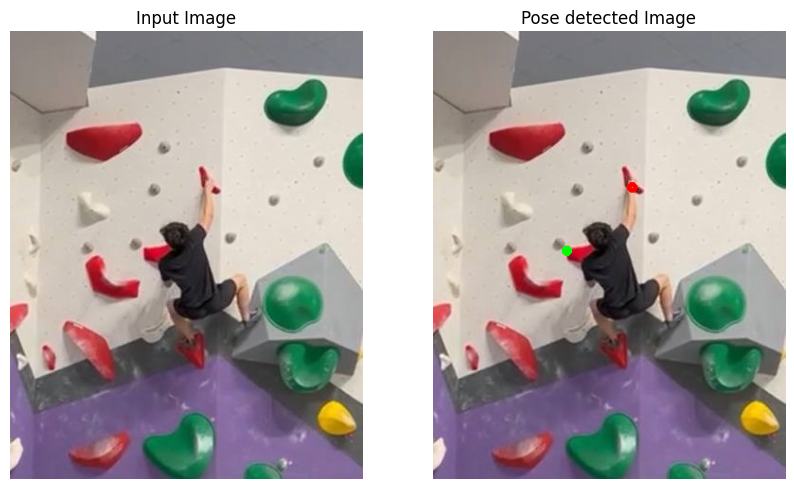

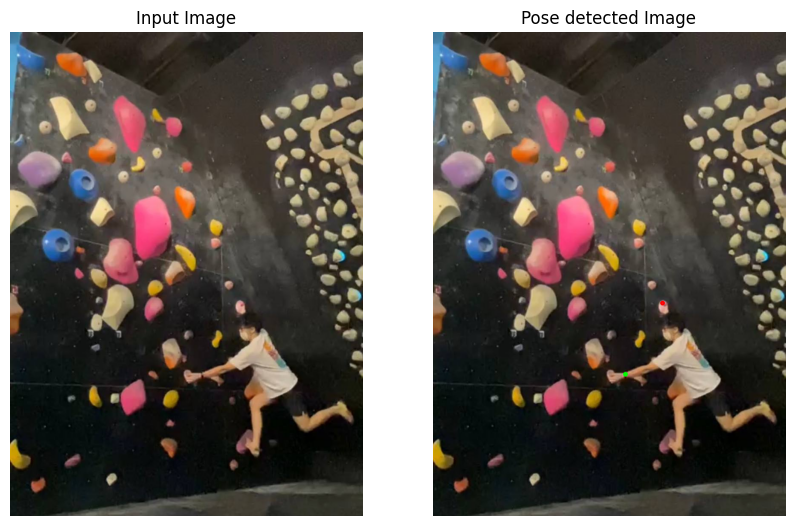

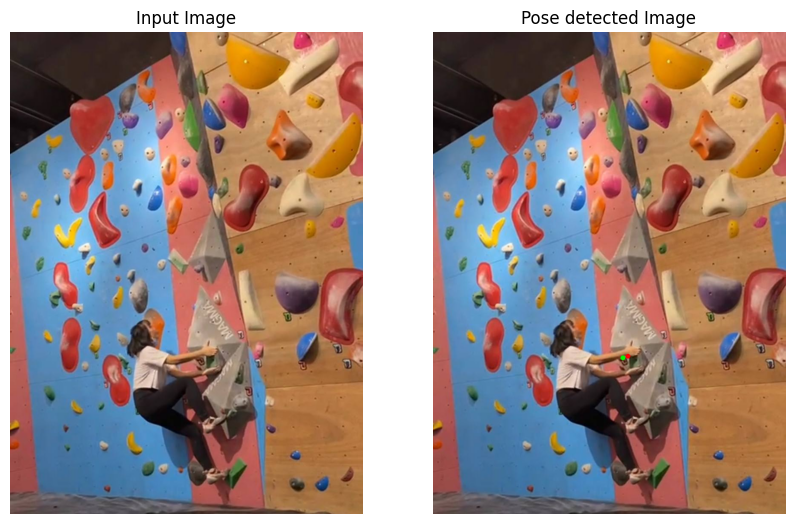

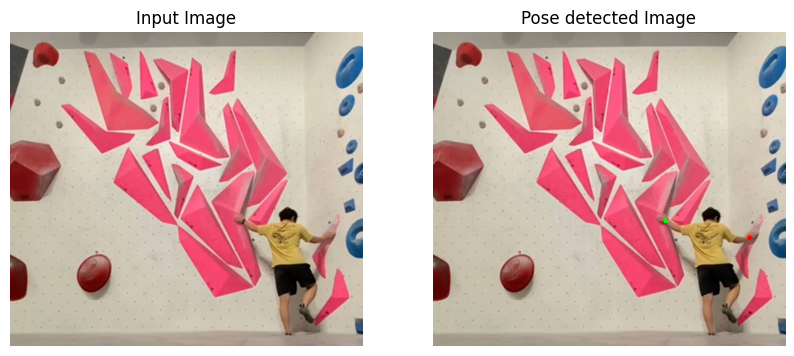

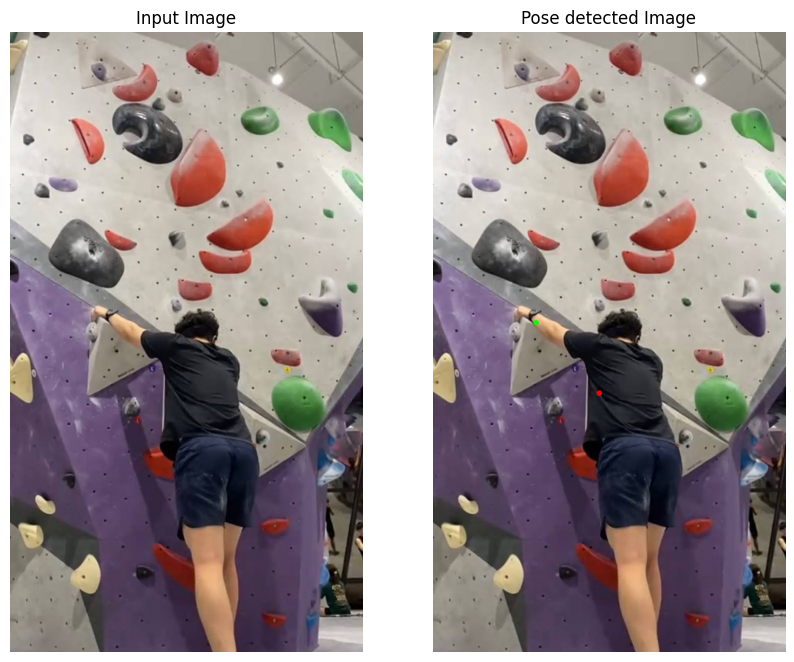

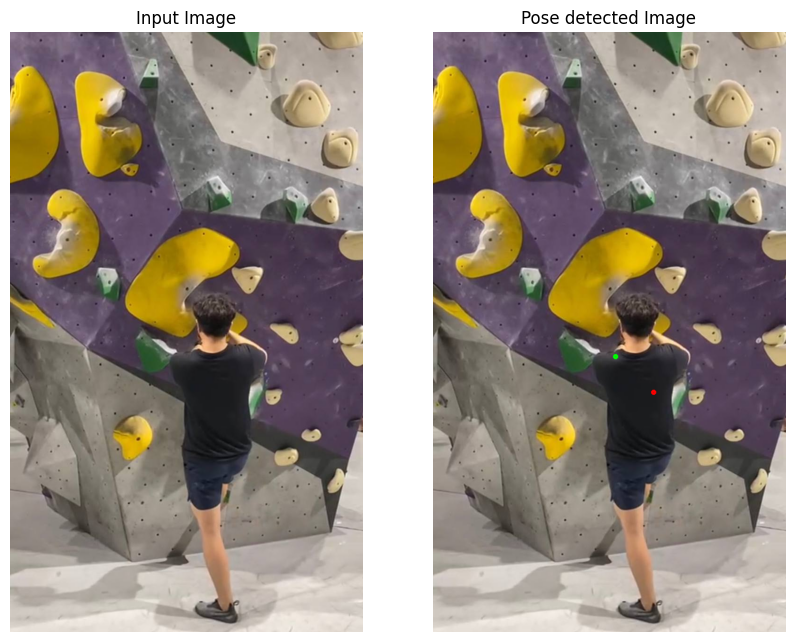

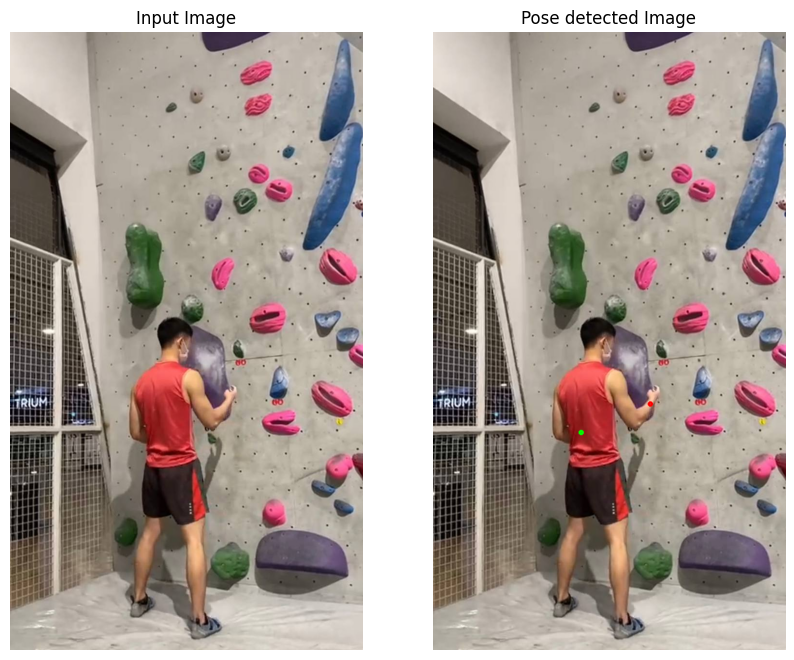

In [10]:
# Here we will read our image from the specified path to detect the pose
image_path = "C:/Users/user/Desktop/RCP/ClimbAssistant/data/test/cropped"
for image in os.listdir(image_path):
    im = os.path.join(image_path, image)
    output = cv2.imread(im)
    detectPose(output, pose_image, draw=True, display=True)